In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("/content/Instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

Python yordamida Instagramga kirish tahlili
Endi keling, kerakli Python kutubxonalari va ma'lumotlar to'plamini import qilish orqali Instagram akkauntimning imkoniyatlarini tahlil qilish vazifasini boshlaylik :

Hamma narsani boshlashdan oldin, keling, ushbu ma'lumotlar to'plamida null qiymatlar mavjudmi yoki yo'qligini ko'rib chiqaylik:

In [4]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Shunday qilib, har bir ustunda null qiymati bor. Keling, barcha null qiymatlarni tashlab, davom etaylik:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     99 non-null     int64 
 1   From Home       99 non-null     int64 
 2   From Hashtags   99 non-null     int64 
 3   From Explore    99 non-null     int64 
 4   From Other      99 non-null     int64 
 5   Saves           99 non-null     int64 
 6   Comments        99 non-null     int64 
 7   Shares          99 non-null     int64 
 8   Likes           99 non-null     int64 
 9   Profile Visits  99 non-null     int64 
 10  Follows         99 non-null     int64 
 11  Caption         99 non-null     object
 12  Hashtags        99 non-null     object
dtypes: int64(11), object(2)
memory usage: 10.2+ KB


Keling, barcha ustunlarning ma'lumotlar turini tushunish uchun ustunlar haqidagi fikrlarni ko'rib chiqaylik:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


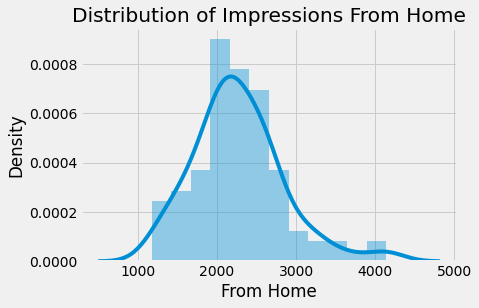

In [6]:

plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

Instagram kirishini tahlil qilish
Endi Instagram-dagi postlarimning qamrovini tahlil qilishdan boshlaylik. Avval uydan olgan taassurotlarim taqsimotini ko'rib chiqaman:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


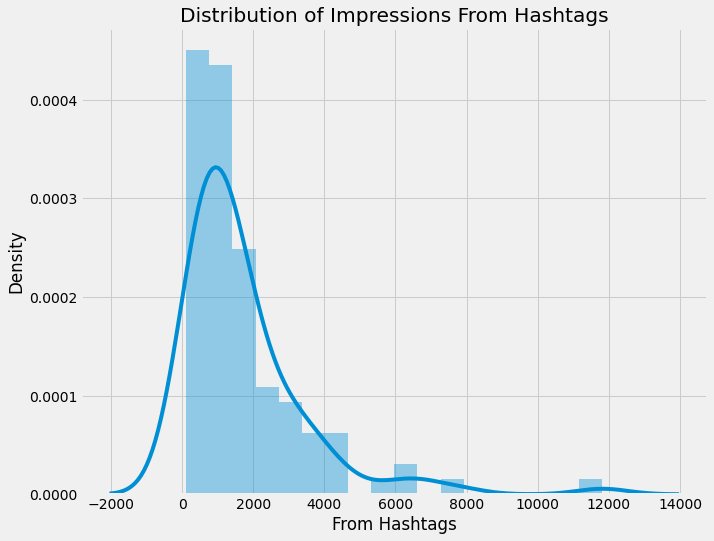

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Instagramdagi uy bo'limidan olgan taassurotlarim postlarim obunachilarga qanchalik yetib borishini ko'rsatadi. Uydan olgan taassurotlarga qarab, har kuni barcha izdoshlarimga erishish qiyinligini ayta olaman. Keling, hashtaglardan olgan taassurotlarimni taqsimlashni ko'rib chiqaylik:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


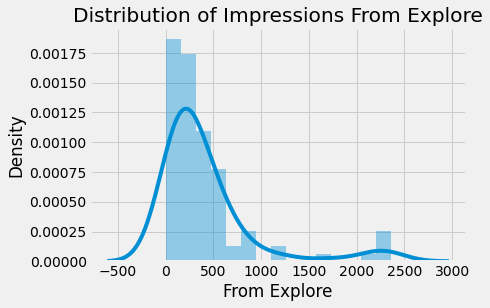

In [8]:

plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

Hashtaglar biz yaratayotgan kontent turiga qarab ko'proq odamlarga murojaat qilishimiz uchun Instagram-dagi postlarimizni turkumlash uchun foydalanadigan vositalardir. Hashtag taassurotlarini ko'rib chiqish shuni ko'rsatadiki, barcha xabarlarga hashtaglar yordamida erishib bo'lmaydi, lekin hashtaglardan ko'plab yangi foydalanuvchilarga kirish mumkin. Endi Instagram’ning o‘rganish bo‘limidan olgan taassurotlarimni taqsimlashni ko‘rib chiqamiz:

In [9]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

Instagramning kashf qilish bo'limi Instagramning tavsiyalar tizimidir. U foydalanuvchilarga ularning afzalliklari va qiziqishlari asosida postlarni tavsiya qiladi. O'rganish bo'limidan olgan taassurotlarimga qarab shuni aytishim mumkinki, Instagram bizning postlarimizni foydalanuvchilarga unchalik tavsiya etmaydi. Ba'zi postlar "tadqiqot" bo'limidan yaxshi ta'sirga ega bo'ldi, lekin men hashtaglardan olganim bilan solishtirganda bu hali ham juda past.

Keling, Instagramdagi turli manbalardan olgan taassurotlarimning foizini ko'rib chiqaylik:

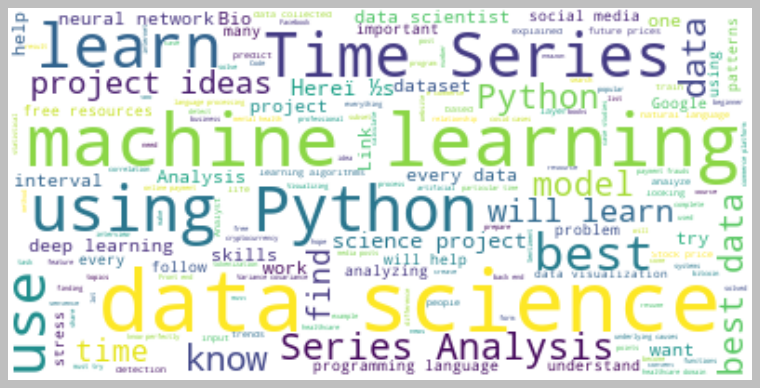

In [10]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Shunday qilib, yuqoridagi donut syujeti shuni ko'rsatadiki, kirishning deyarli 50 foizi mening izdoshlarim, 38,1 foizi hashtaglar, 9,14 foizi tadqiqot bo'limi va 3,01 foizi boshqa manbalardan.


Tarkibni tahlil qilish
Endi Instagram postlarim mazmunini tahlil qilaylik. Ma'lumotlar to'plamida ikkita ustun mavjud, ya'ni sarlavha va hashtaglar, bu menga Instagram-da joylashtirgan kontent turini tushunishga yordam beradi.

Instagramdagi postlarim sarlavhasida eng ko'p ishlatiladigan so'zlarni ko'rish uchun taglavhalar ustunidan so'z bulutini yarataylik:

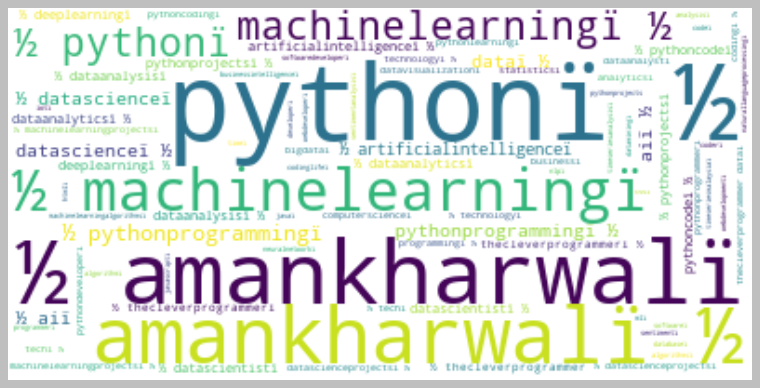

In [11]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Keling, Instagram-dagi postlarimdagi eng ko'p ishlatiladigan hashtaglarni ko'rib chiqish uchun hashtaglar ustunidan so'z bulutini yarataylik:

In [12]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

O'zaro munosabatlarni tahlil qilish
Endi keling, Instagram aloqamizning eng muhim omillarini topish uchun munosabatlarni tahlil qilaylik. Bu bizga Instagram algoritmi qanday ishlashini tushunishga yordam beradi.


Keling, Instagram-dagi postlarimdagi yoqtirishlar soni va taassurotlar soni o'rtasidagi bog'liqlikni ko'rib chiqaylik:

In [13]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

Instagramda yoqtirishlar soni va erishganim o'rtasida chiziqli bog'liqlik mavjud. Keling, Instagram-dagi postlarimdagi sharhlar soni va taassurotlar soni o'rtasidagi bog'liqlikni ko'rib chiqaylik:

In [14]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

Ko‘rinib turibdiki, postga bildirilgan fikr-mulohazalar soni uning kirishiga ta’sir qilmaydi. Keling, aktsiyalar soni va taassurotlar soni o'rtasidagi bog'liqlikni ko'rib chiqaylik:

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

Ko'proq sonli ulashishlar yanada kengayishiga olib keladi, ammo ulashishlar postning kirishiga yoqtirishlar kabi ta'sir qilmaydi. Keling, saqlashlar soni va taassurotlar soni o'rtasidagi bog'liqlikni ko'rib chiqaylik:

In [17]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


Mening postim saqlangan soni va Instagram postimning kirishi o'rtasida chiziqli bog'liqlik mavjud. Endi keling, barcha ustunlarning “Taassurotlar” ustuni bilan o‘zaro bog‘liqligini ko‘rib chiqamiz:

In [18]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


Shunday qilib, shuni aytishimiz mumkinki, ko'proq yoqtirishlar va saqlashlar sizga Instagramda ko'proq kirishga yordam beradi. Aktsiyalar sonining ko'pligi ham sizga ko'proq kirishga yordam beradi, ammo kam sonli aksiyalar ham kirishingizga ta'sir qilmaydi.

Konvertatsiya tezligini tahlil qilish
Instagram-da suhbat tezligi postdan profilga tashriflar sonidan qancha izdosh olishingizni anglatadi. Konversiya tezligini hisoblash uchun foydalanishingiz mumkin bo'lgan formula  (Kuzatuvlar/Profilga tashriflar) * 100 . Endi Instagram akkauntimdagi suhbatlar tezligini ko'rib chiqamiz:

In [19]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

Shunday qilib, mening Instagram akkauntimning suhbat tezligi 31% ni tashkil etadi, bu juda yaxshi suhbat tezligiga o'xshaydi. Keling, profilga umumiy tashriflar va barcha profilga tashriflar natijasida olingan izdoshlar soni o'rtasidagi munosabatni ko'rib chiqaylik:

In [22]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

Profilga tashrif buyurish va olingan izdoshlar o'rtasidagi munosabatlar ham chiziqli.


Instagram erishishni bashorat qilish modeli
Endi ushbu bo'limda men Instagram postining kirishini bashorat qilish uchun mashinani o'rganish modelini o'rgataman. Modelni o'rgatishdan oldin ma'lumotlarni o'quv va test to'plamlariga ajratamiz:

In [23]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.36535625870444666

Endi biz Python yordamida Instagram postining kirishini bashorat qilish uchun mashinani o'rganish modelini qanday o'rgatishimiz mumkin:

In [24]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([13871.68832043])

Keling, mashinani o'rganish modeliga ma'lumot berish orqali Instagram postining qamrovini taxmin qilaylik: